In [19]:
from ariadne.util.deeppcb import DeepPCBData
from pathlib import Path
from PIL import Image, ImageDraw
import numpy as np
import torch
import torchvision
import skimage as ski

import matplotlib.pyplot as plt
import matplotlib.patches as patches

plt.rc('image', cmap='gray')

%matplotlib inline

In [4]:
ds = DeepPCBData(Path('/Users/moon/git/DeepPCB'))

In [5]:
_, gr = ds.groups[0]

pair = gr[0]
annot = DeepPCBData._read_annot(pair['annotpath'])

In [6]:
img_test = np.asarray(Image.open(pair['testpath']).convert('1'))
img_templ = np.asarray(Image.open(pair['templatepath']).convert('1'))

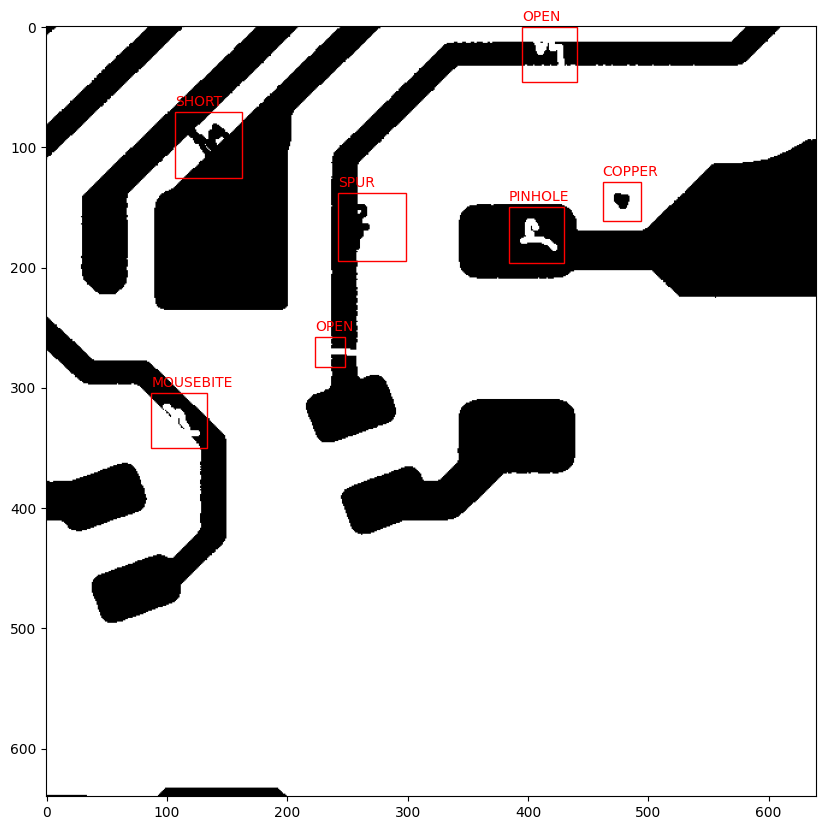

In [34]:
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(img_test)
# ax2.imshow(img_templ)
for defect in annot:
    rect = patches.Rectangle((defect.x0,defect.y0), defect.width, defect.height,
                            facecolor='none', edgecolor='r')
    ax.add_patch(rect)
    ax.text(defect.x0, defect.y0-5, f'{defect.ty.name}', color='r')